In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, GlobalAveragePooling2D

import pathlib
import matplotlib.pyplot as plt


In [2]:

data_dir = "\img\car_data\train"
data_val = "\img\car_data\test"
data_dir = pathlib.Path(data_dir)
data_val = pathlib.Path(data_val)
# image_count = len(list(data_dir.glob('*/*.jpg')))
# print(image_count)
batch_size = 20
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_val,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8144 files belonging to 196 classes.
Using 6516 files for training.
Found 8041 files belonging to 196 classes.
Using 1608 files for validation.


In [3]:
resNet_model = ResNet50(weights=r'C:\Users\c\PycharmProjects\finalassignment\resnet50.h5',include_top=False, input_shape = (img_height,img_width,3))

In [4]:

class_names = train_ds.class_names
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


#RGB is in 255 but for the learning we want to make it [0,1]
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(class_names)
num_classes = 196
model = Sequential()
model.add(resNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax', kernel_initializer='he_normal'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Convertible 2012

c:\users\c\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


326/326 [==============================] - 844s 3s/step - loss: 5.2902 - accuracy: 0.0083 - val_loss: 11.1317 - val_accuracy: 0.0044
Epoch 2/15
326/326 [==============================] - 864s 3s/step - loss: 5.0576 - accuracy: 0.0152 - val_loss: 5.5534 - val_accuracy: 0.0087
Epoch 3/15
326/326 [==============================] - 858s 3s/step - loss: 4.8976 - accuracy: 0.0213 - val_loss: 9.9137 - val_accuracy: 0.0106
Epoch 4/15
326/326 [==============================] - 909s 3s/step - loss: 4.5878 - accuracy: 0.0437 - val_loss: 4.9914 - val_accuracy: 0.0267
Epoch 5/15
326/326 [==============================] - 884s 3s/step - loss: 4.1283 - accuracy: 0.0793 - val_loss: 5.7420 - val_accuracy: 0.0386
Epoch 6/15
326/326 [==============================] - 867s 3s/step - loss: 3.6230 - accuracy: 0.1444 - val_loss: 4.3716 - val_accuracy: 0.0740
Epoch 7/15
326/326 [==============================] - 866s 3s/step - loss: 3.0673 - accuracy: 0.2304 - val_loss: 5.8530 - val_accuracy: 0.0659
Epoch 8/1

In [5]:
model.save('car_picture_classification2.model')


c:\users\c\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: car_picture_classification2.model\assets


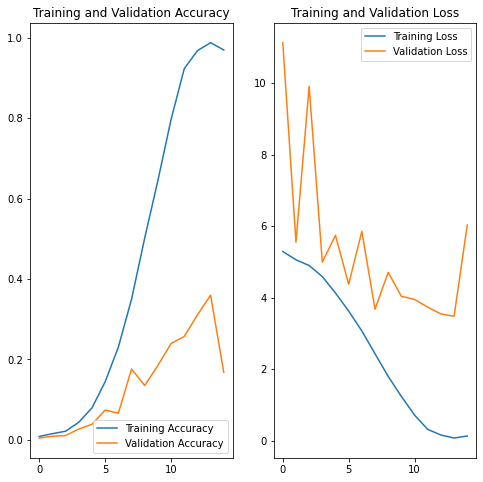

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_ = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_, acc, label='Training Accuracy')
plt.plot(epochs_, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_, loss, label='Training Loss')
plt.plot(epochs_, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
# This code was originally a Predict.py for testing predictions individually


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import PIL
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
import os
import pathlib

classnames = []
root= r'C:\Users\c\PycharmProjects\finalassignment\img\car_data\train'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print("first in the list ",dirlist[0])

model = tf.keras.models.load_model("car_picture_classification2.model")
def classification(path):
    _path = path
    img = keras.preprocessing.image.load_img(
        _path, target_size=(224, 224)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print(np.argmax(score))
    return np.argmax(score)


def cleanUp(str):
    list = str.split()
    return [list[0],list[1],list[-2],list[-1]]

path = r"C:\Users\c\PycharmProjects\finalassignment\img\car_data\test\Aston Martin Virage Convertible 2012\01555.jpg"
df = pd.DataFrame(columns=['Manufacturer', 'Model', 'Body','Year'])
df.loc[0] = cleanUp(dirlist[classification(path)])

print(df)


ModuleNotFoundError: No module named 'pandas'